
# Google Play Store Apps

Dataset: https://www.kaggle.com/lava18/google-play-store-apps

The requirement is to how make an app reach high rating on Google Play Storee
With each column, we have to process, fill na, print general figures of those columns, for example:

Reviews - convert into int type

Size - convert into numeric type, normalize to the same measure unit

Installs - convert into int type

Price - convert into float type

Content Rating - normalize different values (remove 17+, 10+, ...)

Android Ver - normalize to version, take only the first 2 numbers, for example: 4.0.3 --> 4.0

Last Updated - convert into DateTime type

UpdateDays - Create new columns, number of days from Last Update which will be updated until 2020-01-01

## A. Data Engineering

### A.1 Import Libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### A.2 Load Data

In [ ]:
_path = "/content/drive/My Drive/Colab Notebooks/Nordic Coder/Python for Data Analysis/Google Play Store/googleplaystore.csv"
data = pd.read_csv(_path)

###  A.3 Check data shape

In [ ]:
data.shape

(10841, 13)

### A.4 Check null sum

In [ ]:
data["Rating"].isnull().sum()

1474

###  A.5 Check duplicate of all columns

In [ ]:
# --- check dup all column
dup = data[data.duplicated(keep=False)]
data = data.drop_duplicates(keep="first")

In [ ]:
data["App"].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [ ]:
data["App"].nunique()

9660

In [ ]:
data = data.sort_values(["App", "Reviews"])

In [ ]:
dup = data[data.duplicated("App", keep=False)]

In [ ]:
data = data.drop_duplicates("App", keep="last")

In [ ]:
data = data[data["Rating"].isnull()==False]
# missing_data = data.isnull().any(axis=0).reset_index()

## B. Process Data Columns

### B.1 Process Type

In [ ]:
data["Type"].value_counts()

Free    7592
Paid     604
0          1
Name: Type, dtype: int64

In [ ]:
data = data[data["Type"].isin(["Free", "Paid"])]

### B.2 Process Review

In [ ]:
data["Reviews"].dtype

dtype('O')

In [ ]:
data["Reviews"].describe()

count     8196
unique    5321
top          2
freq        82
Name: Reviews, dtype: object

In [ ]:
data["Reviews"] = data["Reviews"].astype(int, errors="ignore")

In [ ]:
data["Reviews"] = pd.to_numeric(data["Reviews"], errors="coerce")

In [ ]:
temp = data["Reviews"].describe()

In [ ]:
q10 = data["Reviews"].quantile(0.1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 150000.0)

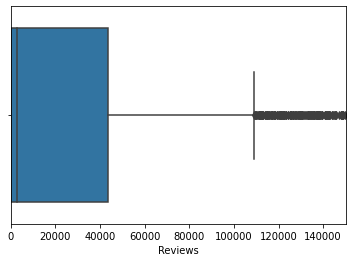

In [ ]:
sns.boxplot(data["Reviews"])
plt.xlim(0, 150000)

### B.3 Process Category

In [ ]:
data["Category"].value_counts()

FAMILY                 1655
GAME                    895
TOOLS                   719
FINANCE                 302
PRODUCTIVITY            301
LIFESTYLE               301
PERSONALIZATION         298
MEDICAL                 290
BUSINESS                263
PHOTOGRAPHY             263
SPORTS                  260
COMMUNICATION           256
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           149
DATING                  134
MAPS_AND_NAVIGATION     118
EDUCATION               105
FOOD_AND_DRINK           94
ENTERTAINMENT            86
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       64
HOUSE_AND_HOME           61
ART_AND_DESIGN           59
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

### B.4 Process Genres

In [ ]:
data["Genres"].value_counts()

Tools                                 718
Entertainment                         471
Education                             429
Finance                               302
Productivity                          301
                                     ... 
Card;Brain Games                        1
Health & Fitness;Education              1
Communication;Creativity                1
Adventure;Education                     1
Video Players & Editors;Creativity      1
Name: Genres, Length: 115, dtype: int64

### B.5 Process Size

In [ ]:
data["Size"].dtype

dtype('O')

In [ ]:
data["Size"].value_counts()

Varies with device    1169
14M                    149
12M                    146
11M                    144
13M                    143
                      ... 
963k                     1
116k                     1
562k                     1
41k                      1
626k                     1
Name: Size, Length: 414, dtype: int64

#### B.5.1 Visualize Rating & Size with Joint Plot

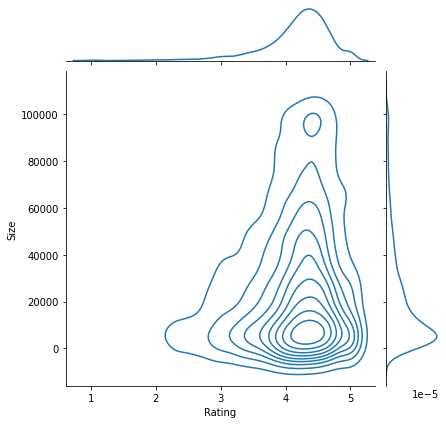

In [ ]:
#===== Method 1
temp = data["Size"].str.extract("([\d\.]*)([\w ]*)", expand=True)
temp.columns = ["value", "type"]
temp["value"] = pd.to_numeric(temp["value"], errors="coerce")
temp.loc[temp["type"] == "M", "value"] = temp["value"] * 1024
data["Size"] = temp["value"]

sns.jointplot(data=data, x="Rating", y="Size", kind="kde")

#### B.5.2 Visualize Rating & Size with Lm Plot

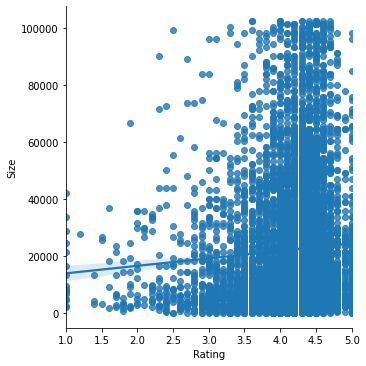

In [ ]:
sns.lmplot(x="Rating", y="Size", data=data)
#plt.savefig(os.getcwd() + "/tutorial/bt/rating_size.png", dpi=100)

#### B.5.3 Measure correlation 

In [ ]:
data["Size"].corr(data["Rating"])

0.06305364907952696

<Figure size 432x288 with 0 Axes>

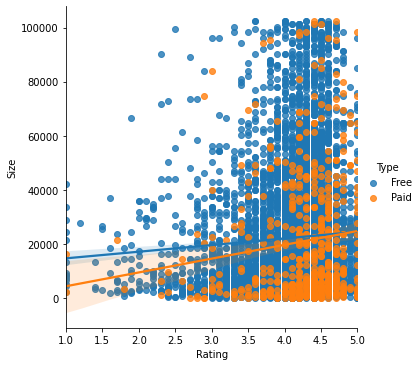

In [ ]:
plt.figure()
sns.lmplot(x="Rating", y="Size", data=data, hue="Type")
#plt.savefig(os.getcwd() + "/tutorial/bt/rating_size_type.png", dpi=100)

#### B.5.4 Deeper measure correlation

In [ ]:
data[data["Type"]=="Paid"]["Size"].corr(data[data["Type"]=="Paid"]["Rating"])

0.12411916941229405

In [ ]:
# =============================================================================
# #===== Method 2
# def xuly_size(row):
#     size = row["Size"]
#     if size == "Varies with device":
#         size = ""
#     if "M" in size:
#         size = size.replace("M", "")
#         size = float(size)
#         size = size * 1024
#     elif "k" in size:
#         size = size.replace("k", "")
#         size = float(size)
#     row["Size"] = size
#     return row
# 
# data = data.apply(xuly_size, axis=1)
# data["Size"] = pd.to_numeric(data["Size"], errors="coerce")
# data["Size"].describe()

In [ ]:
temp = data.groupby('Category')['Size'].transform('mean')

### B.6 Process Installs

In [ ]:
data["Installs"].value_counts()

1,000,000+        1416
100,000+          1095
10,000+            986
10,000,000+        934
1,000+             697
5,000,000+         608
500,000+           504
50,000+            457
5,000+             425
100+               303
50,000,000+        203
500+               199
100,000,000+       188
10+                 69
50+                 56
500,000,000+        24
1,000,000,000+      20
5+                   9
1+                   3
Name: Installs, dtype: int64

Installs has values of redundant "+" so I will replace it with no space between numeric values and set all values as int type.

In [ ]:
data["Installs"] = data["Installs"].str.replace("+", "")
data["Installs"] = data["Installs"].str.replace(",", "")
data["Installs"] = data["Installs"].astype(int)

### B.7 Process Price

In [ ]:
data["Price"].value_counts()

0          7592
$2.99       109
$0.99       104
$4.99        68
$1.99        59
           ... 
$19.40        1
$1.76         1
$2.00         1
$400.00       1
$3.08         1
Name: Price, Length: 73, dtype: int64

Price has redundant "$" in its value so I remove it with no space between texts.

In [ ]:
data["Price"] = data["Price"].str.replace("$", "")
data["Price"] = data["Price"].astype(float)

#### B.7.1 Analysis of Paid Type vs Price

In [ ]:
data["Price"].describe()

count    8196.000000
mean        1.037884
std        16.857882
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [ ]:
data[data["Type"] == "Paid"]["Price"].describe()

count    604.000000
mean      14.083609
std       60.648084
min        0.990000
25%        1.990000
50%        2.990000
75%        4.990000
max      400.000000
Name: Price, dtype: float64

#### B.7.2 Visualize with Box Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 15.0)

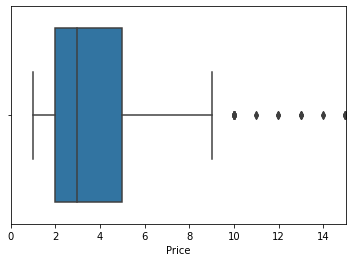

In [ ]:
sns.boxplot(data[data["Type"] == "Paid"]["Price"])
plt.xlim(0, 15)

In [ ]:
data["Type"].value_counts()

Free    7592
Paid     604
Name: Type, dtype: int64

### B.8 Process Content Rating

In [ ]:
data["Content Rating"].value_counts()

Everyone           6618
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Content Rating needs only the first letter so I remove the rest of its value content from space on wards, for example: Mature 17+ --> Mature.

In [ ]:
data["Content Rating"] = data["Content Rating"].str.split(" ").str.get(0)

#### Analysis of Content Rating & Rating

##### B.8.1 Visualize with Histogram

(4.0, 4.4)

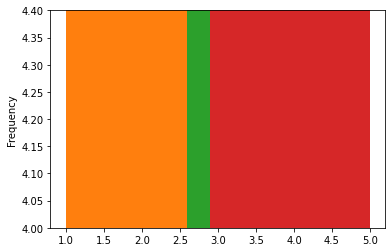

In [ ]:
data.groupby('Content Rating')['Rating'].plot(kind='hist')
plt.ylim(4, 4.4)

##### B.8.2 Visualize with Bar Chart

(4.0, 4.4)

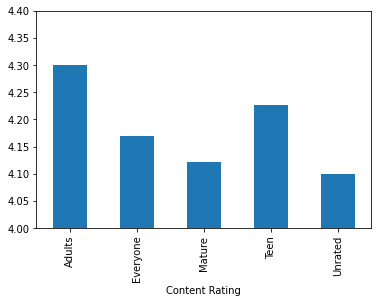

In [ ]:
data.groupby('Content Rating')['Rating'].mean().plot(kind='bar')
plt.ylim(4, 4.4)

In [ ]:
data["Rating"].value_counts()

4.3    897
4.4    897
4.5    849
4.2    811
4.6    683
4.1    621
4.0    513
4.7    438
3.9    359
3.8    286
5.0    271
3.7    224
4.8    221
3.6    167
3.5    156
3.4    126
3.3    100
4.9     85
3.0     81
3.1     69
3.2     63
2.9     45
2.8     40
2.6     24
2.7     23
2.3     20
2.5     20
2.4     19
1.0     16
2.2     14
2.0     12
1.9     11
2.1      8
1.7      8
1.8      8
1.6      4
1.5      3
1.4      3
1.2      1
Name: Rating, dtype: int64

Since Rating has different values from 1.2 to 4.3 so I group these values into different bins = [1, 3.5, 4, 4.5, 5] and their equivalent group_names = ["Bad", "Medium", "Good", "VeryGood"]. 

na values are replaced with 0 value.

In [ ]:
bins = [1, 3.5, 4, 4.5, 5]
group_names = ["Bad", "Medium", "Good", "VeryGood"]
data["rating_bin"] = pd.cut(data["Rating"], bins, labels=group_names,
                                 include_lowest=True)
data["rating_bin"].value_counts()
temp = data.groupby("Content Rating")["rating_bin"].value_counts().unstack()
temp = temp.fillna(0)
temp = temp.div(temp.sum(axis=1), axis=0) #sum of each row divided by each then column

In [ ]:
print(data["rating_bin"])

8532        Good
324          Bad
4541        Good
4636    VeryGood
5940        Good
          ...   
6420        Good
4362      Medium
2575    VeryGood
7559      Medium
882     VeryGood
Name: rating_bin, Length: 8196, dtype: category
Categories (4, object): ['Bad' < 'Medium' < 'Good' < 'VeryGood']


In [ ]:
print(temp)

rating_bin           Bad    Medium      Good  VeryGood
Content Rating                                        
Adults          0.000000  0.333333  0.333333  0.333333
Everyone        0.111801  0.185902  0.489672  0.212625
Mature          0.120448  0.224090  0.498599  0.156863
Teen            0.062500  0.198465  0.553728  0.185307
Unrated         0.000000  0.000000  1.000000  0.000000


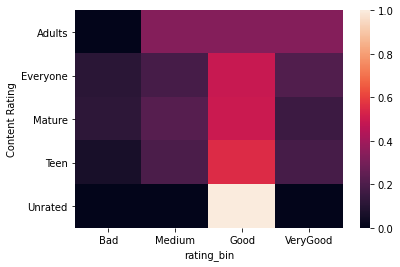

In [ ]:
sns.heatmap(temp)   

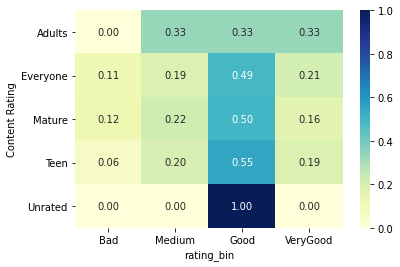

In [ ]:
sns.heatmap(temp, cmap="YlGnBu", annot=True, fmt=".2f")

In [ ]:
temp = data.groupby("Content Rating")["rating_bin"].value_counts().reset_index(name="count")
temp1 = data["Content Rating"].value_counts().reset_index(name="sum")
temp1.columns=["Content Rating", "sum"]
temp = pd.merge(temp, temp1, on="Content Rating", how="left")
temp["percent"] = temp["count"] / temp["sum"]

In [ ]:
print(temp1)

  Content Rating   sum
0       Everyone  6923
1           Teen   912
2         Mature   357
3         Adults     3
4        Unrated     1


In [ ]:
temp2 = pd.pivot_table(data=temp, values="percent", index="Content Rating",
                       columns="rating_bin")
temp2 = temp2.fillna(0)
temp2 = temp2[group_names]

In [ ]:
print(temp2)

rating_bin           Bad    Medium      Good  VeryGood
Content Rating                                        
Adults          0.000000  0.333333  0.333333  0.333333
Everyone        0.111801  0.185902  0.489672  0.212625
Mature          0.120448  0.224090  0.498599  0.156863
Teen            0.062500  0.198465  0.553728  0.185307
Unrated         0.000000  0.000000  1.000000  0.000000


##### B.8.3 Visualize temp2 with Heatmap

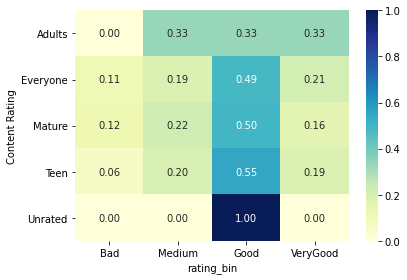

In [ ]:
# plt.figure(figsize=(7, 7))
sns.heatmap(temp2, cmap="YlGnBu", annot=True, fmt=".2f")
plt.yticks(rotation=0)
plt.tight_layout()

##### B.8.4 Visualize temp2 with Box Plot

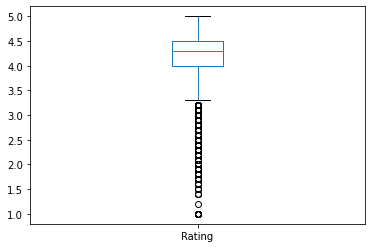

In [ ]:
data.plot(x='Content Rating', y='Rating', kind='box')

Content Rating
Adults      AxesSubplot(0.125,0.125;0.775x0.755)
Everyone    AxesSubplot(0.125,0.125;0.775x0.755)
Mature      AxesSubplot(0.125,0.125;0.775x0.755)
Teen        AxesSubplot(0.125,0.125;0.775x0.755)
Unrated     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Rating, dtype: object

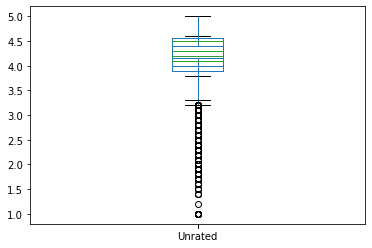

In [ ]:
data.groupby("Content Rating")["Rating"].plot(kind='box')

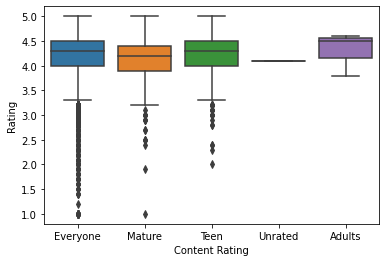

In [ ]:
sns.boxplot(x='Content Rating', y='Rating', data=data)

This is just a Viz demo of flights

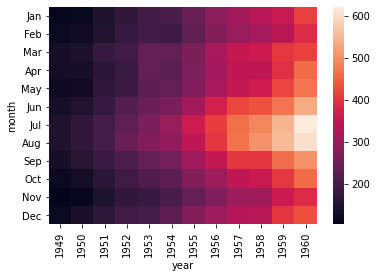

In [ ]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

### B.9 Process Last Update

In [ ]:
data["Last Updated"] = pd.to_datetime(data["Last Updated"], format="%B %d, %Y",
                                      errors="coerce")

### B.10 Process Android Ver

In [ ]:
data["Android Ver"].value_counts()

4.1 and up            1812
4.0.3 and up          1140
4.0 and up            1042
Varies with device     947
4.4 and up             713
2.3 and up             548
5.0 and up             447
4.2 and up             316
2.3.3 and up           232
2.2 and up             203
3.0 and up             200
4.3 and up             185
2.1 and up             112
1.6 and up              87
6.0 and up              42
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              16
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
8.0 and up               5
4.4W and up              5
7.1 and up               3
1.0 and up               2
4.0.3 - 7.1.1            2
5.0 - 8.0                2
4.1 - 7.1.1              1
7.0 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [ ]:
data["Android Ver"] = data["Android Ver"].replace("Varies with device", "")
temp = data["Android Ver"].str.split(" ").str.get(0)
temp1 = temp.str.split(".").str[0] + "." + temp.str.split(".").str[1]
data["Android Ver"] = temp1.str.replace("W", "")
data["Android Ver"] = pd.to_numeric(data["Android Ver"])
data["Android Ver"] = data["Android Ver"].fillna(data["Android Ver"].value_counts().idxmax())

## C. Pre-Process

In [ ]:
#data = data[data["Rating"].isnull()==False]
#data = data.sort_values(["Last Updated"])

#data = data.drop_duplicates(keep="first")
#data = data.drop_duplicates("App", keep="last")

## D. Visualization

### D.1 Visualize Rating

In [ ]:
data['Rating'].describe()

count    8196.000000
mean        4.173084
std         0.536522
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Rating')

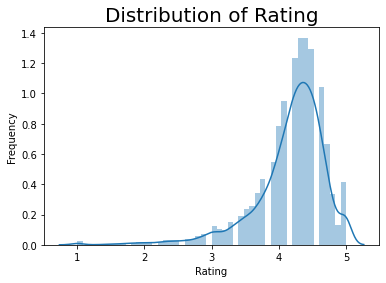

In [ ]:
plot = sns.distplot(data["Rating"], bins=50)
plot.set_xlabel("Rating")
plot.set_ylabel("Frequency")
plt.title("Distribution of Rating", size=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


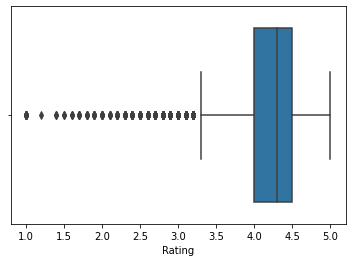

In [ ]:
sns.boxplot(data["Rating"])
q25 = data["Rating"].quantile(.25)
q75 = data["Rating"].quantile(.75)
d = q75-q25
q0 = max(min(data["Rating"]), q25 - d)
q99 = min(max(data["Rating"]), q75 + d)

In [ ]:
# sns.set()

Text(0.5, 1.0, 'Boxplot of Rating VS Category')

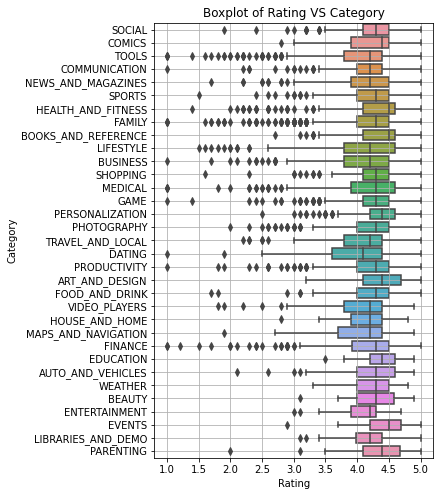

In [ ]:
plt.figure(figsize=(5, 8))
# sns.boxplot(data=data, x="Category", y="Rating")
sns.boxplot(data=data, y="Category", x="Rating")
# plt.xticks(rotation=90)
plt.grid()
plt.title("Boxplot of Rating VS Category")

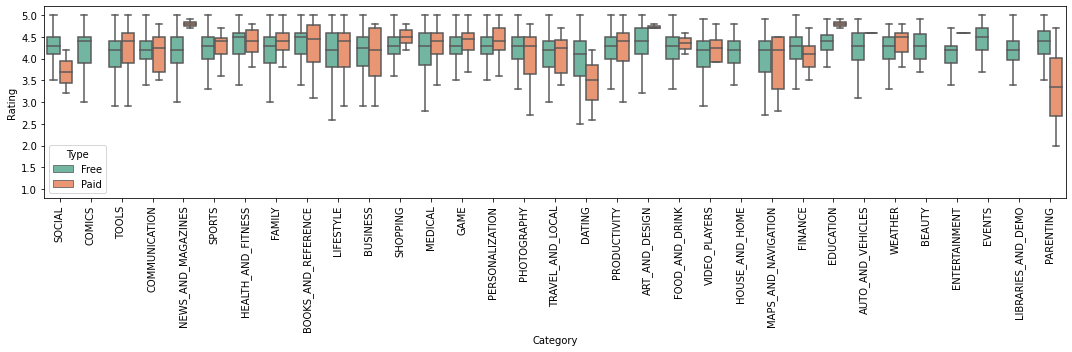

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=data, x="Category", y="Rating", hue="Type",
            fliersize=0, palette="Set2")
plt.xticks(rotation=90)
plt.tight_layout()
#plt.savefig(os.getcwd() + "/rating_cate_type.png", dpi=100)

### D.2 Visualize Genres

In [ ]:
temp = data['Genres'].str.split(';', expand=True)
temp = pd.merge(data[["App", "Rating", "Content Rating"]], temp,
                left_index=True, right_index=True)
temp.loc[temp[0] == temp[1], 1] = None

temp1 = pd.melt(temp, id_vars="App", value_name="Genre", value_vars=[0, 1])
temp1 = pd.merge(temp1, data[["App", "Rating", "Type"]], on="App", how="left")
temp1 = temp1.dropna(subset=["Genre"])
temp1 = temp1.sort_values("Genre")

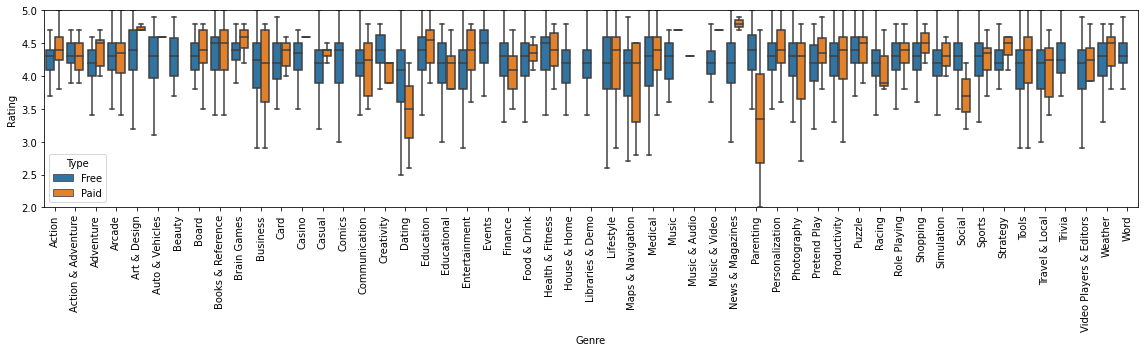

In [ ]:
plt.figure(figsize=(16, 5))
sns.boxplot(data=temp1, x="Genre", y="Rating", hue="Type", fliersize=0)
plt.xticks(rotation=90)
plt.ylim(2, 5)
plt.tight_layout()
#plt.savefig(os.getcwd() + "/tutorial/bt/rating_genre_typeg.png", dpi=100)

In [ ]:
# temp = pd.melt(temp, id_vars=["App", "Content Rating"], value_name="Genre", value_vars=[0, 1])

## E. Build Model

### E.1 Pre-Process

In [ ]:
def pre_process(data):
    data = data[data["Rating"].isnull()==False]
    
    data["Last Updated"] = pd.to_datetime(
        data["Last Updated"], format="%B %d, %Y", errors="coerce")
    data["Days Tonow"] = (datetime(2019, 1, 1) - data["Last Updated"]).dt.days
    data = data.sort_values(["Last Updated"])
    
    data = data.drop_duplicates(keep="first")
    data = data.drop_duplicates("App", keep="last")
    
    data = data[data["Type"].isin(["Free", "Paid"])]
    
    data["Reviews"] = data["Reviews"].astype(int, errors="ignore")
    data["Reviews"] = pd.to_numeric(data["Reviews"], errors="coerce")
    
    data["Category"] = data["Category"].str.lower()

    temp = data["Size"].str.extract("([\d\.]*)([\w ]*)", expand=True)
    temp.columns = ["value", "type"]
    temp["value"] = pd.to_numeric(temp["value"], errors="coerce")
    temp.loc[temp["type"] == "M", "value"] = temp["value"] * 1024
    data["Size"] = temp["value"]
    data['Size'].fillna(data.groupby('Category')['Size'].transform('mean'), inplace = True)
    
    data["Installs"] = data["Installs"].str.replace("+", "")
    data["Installs"] = data["Installs"].str.replace(",", "")
    data["Installs"] = data["Installs"].astype(int)

    data["Price"] = data["Price"].str.replace("$", "")
    data["Price"] = data["Price"].astype(float)
    
    data["Content Rating"] = data["Content Rating"].str.split(" ").str.get(0)

    data["Android Ver"] = data["Android Ver"].replace("Varies with device", "")
    temp = data["Android Ver"].str.split(" ").str.get(0)
    temp1 = temp.str.split(".").str[0] + "." + temp.str.split(".").str[1]
    data["Android Ver"] = temp1.str.replace("W", "")
    data["Android Ver"] = pd.to_numeric(data["Android Ver"])
    data["Android Ver"] = data["Android Ver"].fillna(data["Android Ver"].value_counts().idxmax())
    
    return data
data = pre_process(data) 

TypeError: ignored

### E.2 Featuring

In [ ]:
def featuring(data):
    col = ["App", "Rating", "Category", "Reviews", "Size", "Installs", "Type",
       "Price", "Content Rating", "Android Ver", "Days Tonow"]
    data = data[col]
    
    dum_cate = pd.get_dummies(data["Category"], prefix="cate_") #Scikit learn buộc kiểu chữ chuyển về kiểu số --> thay chữ bằng số dummy: DUMMY VARIABLE hoặc ONE HOT & CODING hoặc LABEL CODING 
    data = pd.merge(data, dum_cate[:-1], left_index=True, right_index=True)
    
    dum_type = pd.get_dummies(data["Type"], prefix="type_") # note lại tập đã làm dummy. Giá trị ko dùng thì để null. Nên giữ all để sau này run model: test, train, predict. Những columns mới mà null thì ko ảnh hưởng model. Tháng sau train lại thì bổ sung thêm column rồi get trained lại cho model mới.
    data = pd.merge(data, dum_type[:-1], left_index=True, right_index=True)
    
    data.drop(["Category", "Type"], axis=1, inplace=True)
    
    data["Content Rating"].value_counts() # ko dùng Dummy coding thì dùng Label coding 
    data = data[data["Content Rating"] != "Unrated"]
    map_dict = {"Everyone": 0, "Teen": 1, "Mature": 2, "Adults": 3}
    data["Content Rating"] = data["Content Rating"].map(map_dict) #--> further info
    return data
data = featuring(data) 

### E.3 Prediction

In [ ]:
def predict():
    _path = "/Users/phuongdaingo/Documents/Python/PythonFrankie/Package1/google-play-store-apps/googleplaystore.csv"
    data = pd.read_csv(_path)
    data = pre_process(data)
    data = featuring(data)
    
    #--------------
    ## Split data into TRAIN & TEST --->>> chia train & test ko theo tiêu chí nào cả thì sẽ giữ tính khách quan. Chia thành 2 tập nhỏ test & train để tự test nhanh hơn kaggle 
    # Method 1 
    train = data.sample(frac=0.7) # take 70% data to train
    test = data[~data["App"].isin(train["App"])] # filter out theo "App" những cái có trong data tổng mà ko có trong train
    x_train = train.iloc[:, 2:] #lấy tất cả row; sau , từ index 2 là từ cột Review trở về sau
    y_train = train["Rating"]
    x_test = test.iloc[:, 2:]
    y_test = test["Rating"]
    
    # Method 2
    x_train, x_test, y_train, y_test = train_test_split(
        data.iloc[:,2:], data["Rating"], test_size=0.3) # df.iloc[:, 1:] là input nhận vào x. data['Rating'] nhận vào y. Tỉ lệ chia cho test: test_size
    #-------------- 
    
    # Use Linear Regression as Model to learn via 'train' : ---> predict y. Features are x1, x2, x3,... --->>> return Rating = alpha * Review + beta * Size + gamma * Review + ...
    model = LinearRegression() # --->>> further info; check Decision Trees
    model.fit(x_train, y_train) #x_train is feature; y_train is label
    
    # Predict by above Model via 'test' by feature x'test' :
    y_predict = model.predict(x_test) # This step is to predict via 'test' ; # Call back 'model'. Function predict. Insert feature : x_test
    
    y_test = y_test.reset_index(drop=True) # reset index to make y_test & y_predict correspond with each other
    
    # Count mae, mse, rmse. Then return rmse : --->>> # All error must be close to 0 to be righter (means that Prediction is right). /= Regression Recall must be close to 1. # must import this function from sklearn.metrics as beginning
    mae = mean_absolute_error(y_test, y_predict) # = 0.37. Sai số trung bình. Open y_test & y_predict at the same time to compare
    mse = mean_squared_error(y_test, y_predict) # = 0.274
    rmse = math.sqrt(mse) # Skitlearn only support mse. So to count rsme, count sqrt of mse instead 
    
    return rmse

- After evaluation, errors is satisfactory. Further development or improvement will be ...
- Regression Recall output may be low but comparing with other programmes, it is more effective.
- We can adjust / modify number of customers ...
- We can see which reasons why customers ...
- Feedback which feature has the most impact on results ...

 Further action :
 - If needed to merge x_test, y_test together, we must reset_index of both before merging.

In [ ]:
predict()